In [3]:
from glob import iglob
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import numpy as np

In [4]:
%config InlineBackend.figure_format = 'svg'

In [5]:
path = 'datasets_babynames' # use your path
allFiles = iglob(path + "/*.txt")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,header=None,names=['name','gender','cnt'], sep=',')
    df['year']=file_[-8:-4]
    list_.append(df)

baby = pd.concat(list_, axis = 0, ignore_index = True)

In [6]:
baby.head()

,name,gender,cnt,year
0,Mary,F,14275,1903
1,Helen,F,6129,1903
2,Anna,F,5098,1903
3,Margaret,F,5046,1903
4,Ruth,F,4518,1903


Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [7]:
#реализуйте группировку groupby
baby1=baby.groupby(['gender','year'])['cnt'].sum().reset_index()

In [8]:
baby1.head()

,gender,year,cnt
0,F,1880,90993
1,F,1881,91955
2,F,1882,107851
3,F,1883,112322
4,F,1884,129021


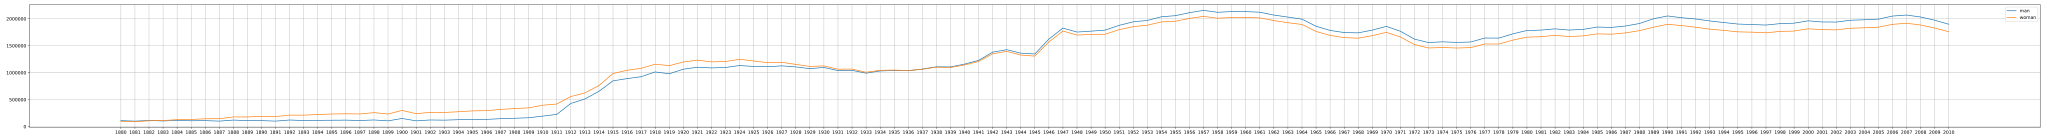

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(80,5))
plt.grid()
plt.plot(baby1[baby1['gender']=='M']['year'],baby1[baby1['gender']=='M']['cnt'] )
plt.plot(baby1[baby1['gender']=='F']['year'],baby1[baby1['gender']=='F']['cnt'])
plt.legend(['man','woman'])
plt.show()

plt.tight_layout()

Найдите самые популярные имена за всю историю

In [10]:
baby[['name','cnt']].groupby('name').sum().sort_values(by='cnt', ascending=False).head(20)

,cnt
name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074
William,4002392
David,3538748
Richard,2552269
Joseph,2529809


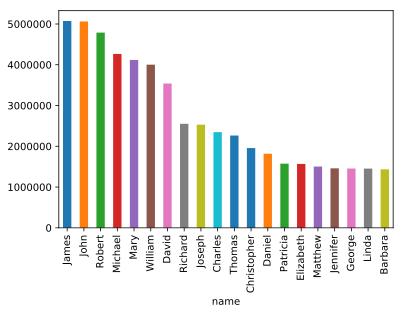

In [11]:
total = baby.groupby(['name']).sum().sort_values('cnt', ascending=False)['cnt'][:20]
total.plot.bar()
plt.show()

## Задачи

**1**  Разбейте весь временной промежуток в данных на 10 частей 

**2.** и для каждой найдите самое популярное имя каждого пола. 

**3.** Для каждого найденного имени визуализируйте его динамику за все время

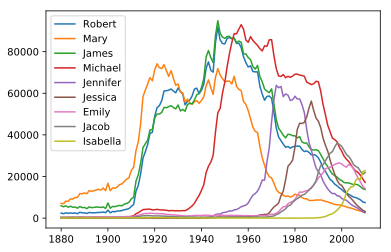

In [12]:
bins = np.array(baby.year.astype(int).quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]))
bins = bins.astype(int)

bins = bins.tolist()
years = range(1880, 2011)

total_baby = baby.groupby(['gender', 'year', 'name']).sum().unstack()
decade_stat = []

for i in bins:
    index = bins.index(i)
    if len(bins) > index+1:
        next_year = bins[index+1]
    else:
        next_year = 2010
    delta_year = next_year - i

    male = total_baby.loc['M'].loc[str(i):str(i+delta_year)].sum()
    female = total_baby.loc['F'].loc[str(i):str(i + delta_year)].sum()

    m_name = male[male == male.max()].index[0][1]
    f_name = female[female == female.max()].index[0][1]
    if m_name not in decade_stat:
        decade_stat.append(m_name)
    if f_name not in decade_stat:
        decade_stat.append(f_name)

total_baby = baby.groupby(['name', 'year']).sum().unstack()

years = range(1880, 2011)

for name in decade_stat:
    plt.plot(years, total_baby.loc[name], label=name)

plt.legend()
plt.show()

## Тот же отчет только гистограмма использовалась.

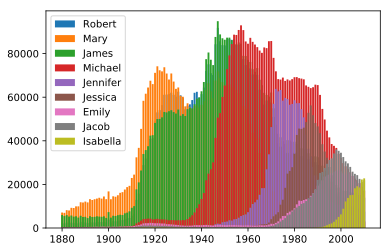

In [13]:
bins = np.array(baby.year.astype(int).quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]))
bins = bins.astype(int)

bins = bins.tolist()
years = range(1880, 2011)

total_baby = baby.groupby(['gender', 'year', 'name']).sum().unstack()
decade_stat = []

for i in bins:
    index = bins.index(i)
    if len(bins) > index+1:
        next_year = bins[index+1]
    else:
        next_year = 2010
    delta_year = next_year - i

    male = total_baby.loc['M'].loc[str(i):str(i+delta_year)].sum()
    female = total_baby.loc['F'].loc[str(i):str(i + delta_year)].sum()

    m_name = male[male == male.max()].index[0][1]
    f_name = female[female == female.max()].index[0][1]
    if m_name not in decade_stat:
        decade_stat.append(m_name)
    if f_name not in decade_stat:
        decade_stat.append(f_name)

total_baby = baby.groupby(['name', 'year']).sum().unstack()

years = range(1880, 2011)

for name in decade_stat:
    plt.bar(years, total_baby.loc[name], label=name)

plt.legend()
plt.show()

**Задача:** 
Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте
(мы увидим разнообразие имен за каждый год)

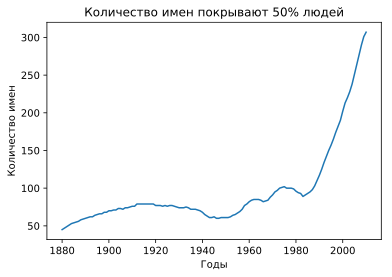

In [29]:
total_baby = baby.groupby(['year', 'name']).sum().unstack()

names_number = []
for year in range(1880, 2011):
    year = str(year)
    half_year = total_baby.loc[year].sum() / 2
    sorted_baby_year = total_baby.loc[year].sort_values(ascending=False)
    for i in range(1, len(total_baby.loc[year])):
        s = sorted_baby_year[:i].sum()
        if s >= half_year:
            names_number.append(i)
            break

years = range(1880, 2011)
plt.plot(years, names_number)
plt.title('Количество имен покрывают 50% людей')
plt.xlabel('Годы')
plt.ylabel('Количество имен')
plt.show()

**Задача:** 
Выберите 4 года из всего промежутка и отобразите для каждого года
распределение по **первой букве в имени**

/home/airat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


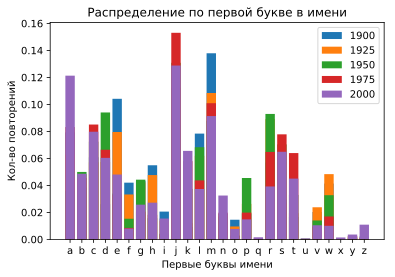

In [30]:
index = 0
letters = list('abcdefghijklmnopqrstuvwxyz')


ys = []
for i in range(1900, 2010, 25):
    y = baby[baby['year'] == str(i)]
    y['first_letters'] = y.loc[:,'name'].str.lower().str[index]
    gr = y.groupby(['first_letters'])['cnt'].sum()
    for l in letters:
        if l not in gr:
            gr = gr.append(pd.Series({l: 0}), )
    gr.sort_index(inplace=True)
    gr = gr / gr.sum()
    ys.append(gr)

for i in range(len(ys)):
#     plt.plot(letters, ys[i], label=str(1900 + i * 25))
    plt.bar(letters, ys[i], label=str(1900 + i * 25))
plt.title('Распределение по первой букве в имени')
plt.xlabel('Первые буквы имени')
plt.ylabel('Кол-во повторений')
plt.legend()
plt.show()

**Задача:** 
Выберите 4 года из всего промежутка и отобразите для каждого года
распределение по **по последней букве в имени**

/home/airat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


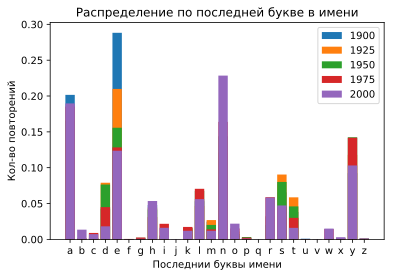

In [31]:
index = -1
letters = list('abcdefghijklmnopqrstuvwxyz')

ys = []
for i in range(1900, 2010, 25):
    y = baby[baby['year'] == str(i)]
    y['last_letters'] = y.loc[:,'name'].str.lower().str[index]
    gr = y.groupby(['last_letters'])['cnt'].sum()
    for l in letters:
        if l not in gr:
            gr = gr.append(pd.Series({l: 0}), )
    gr.sort_index(inplace=True)
    gr = gr / gr.sum()
    ys.append(gr)

for i in range(len(ys)):
#     plt.plot(letters, ys[i], label=str(1900 + i * 25))
    plt.bar(letters, ys[i], label=str(1900 + i * 25))
plt.title('Распределение по последней букве в имени')
plt.xlabel('Последнии буквы имени')
plt.ylabel('Кол-во повторений')
plt.legend()
plt.show()

**Задача:**
Составьте список из нескольких известных людей (президенты, певцы, актеры,
киногерои) и оцените их влияние на динамику имен, постройте наглядную
визуализацию

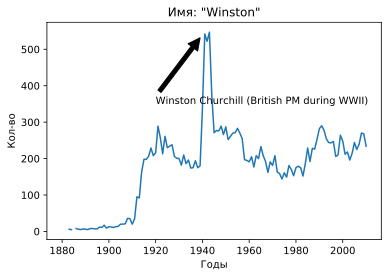

In [62]:
total = baby.groupby(['name', 'year']).sum().unstack()

years = list(range(1880, 2011))
# fig, ax = plt.subplots()
# Winston Churchill (British PM during WWII)
plt.plot(years, total.loc['Winston'])
plt.title('Имя: "Winston"')
plt.xlabel('Годы')
plt.ylabel('Кол-во')
plt.annotate('Winston Churchill (British PM during WWII)',
             xy=(1940, 540),
             xytext=(1920,350),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

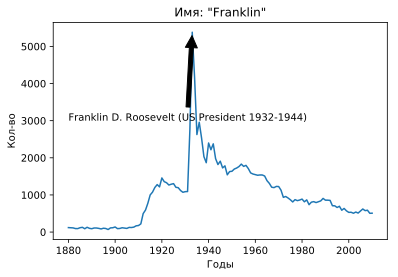

In [60]:
# Franklin D. Roosevelt (US President 1932-1944)
total = baby.groupby(['name', 'year']).sum().unstack()

years = list(range(1880, 2011))
plt.plot(years, total.loc['Franklin'])
plt.title('Имя: "Franklin"')
plt.xlabel('Годы')
plt.ylabel('Кол-во')
plt.annotate('Franklin D. Roosevelt (US President 1932-1944)',
             xy=(1933, 5400),
             xytext=(1880,3000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

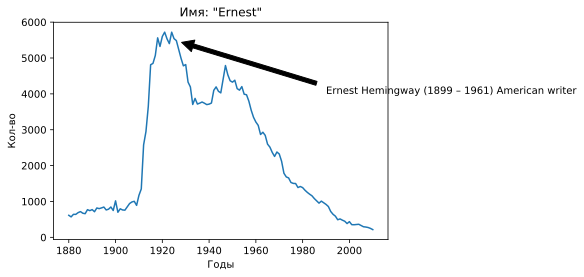

In [69]:
#Ernest Hemingway (1899 – 1961) American writer
total = baby.groupby(['name', 'year']).sum().unstack()

years = list(range(1880, 2011))
plt.plot(years, total.loc['Ernest'])
plt.title('Имя: "Ernest"')
plt.xlabel('Годы')
plt.ylabel('Кол-во')
plt.annotate('Ernest Hemingway (1899 – 1961) American writer',
             xy=(1925, 5500),
             xytext=(1990,4000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

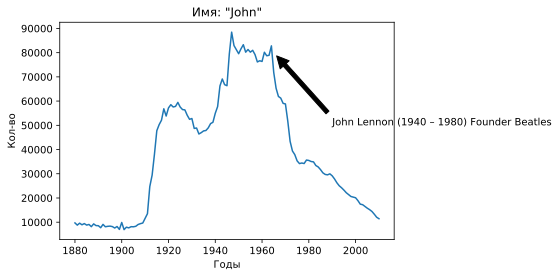

In [74]:
# John Lennon (1940 – 1980) Founder Beatles
total = baby.groupby(['name', 'year']).sum().unstack()

years = list(range(1880, 2011))
plt.plot(years, total.loc['John'])
plt.title('Имя: "John"')
plt.xlabel('Годы')
plt.ylabel('Кол-во')
plt.annotate('John Lennon (1940 – 1980) Founder Beatles',
             xy=(1965, 80000),
             xytext=(1990,50000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()